In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(trainImage, trainLable), (testImage, testLable) = tf.keras.datasets.mnist.load_data()

trainImage = trainImage / 255
testImage = testImage / 255

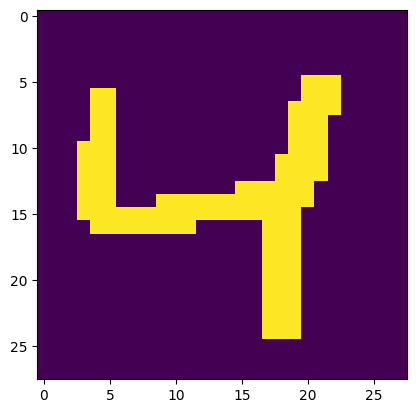

In [3]:
trainImage = trainImage.reshape((len(trainImage), trainImage[0].shape[0], trainImage[0].shape[1], 1))
trainImage = np.ceil(trainImage)

plt.imshow(trainImage[2])


In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, 3, activation = 'relu', input_shape = (28, 28, 1)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPool2D((2, 2), strides = 2),

    tf.keras.layers.Conv2D(64, 3, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPool2D((2, 2), strides = 2),

    tf.keras.layers.Flatten(),
    
    # tf.keras.layers.Dense(128, activation = 'relu'),
    # tf.keras.layers.Dropout(0.3),

    # tf.keras.layers.Dense(64, activation = 'relu'),
    # tf.keras.layers.Dropout(0.3),

    # tf.keras.layers.Dense(32, activation = 'relu'),
    # tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [5]:
# model.summary()

In [6]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.03),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['acc']
)

In [7]:
import os

if os.path.exists('../SavedModel/CNN1.h5'):
    model.load_weights('../SavedModel/CNN1.h5')

# history = model.fit(
#     trainImage,
#     trainLable,
#     batch_size = 64,
#     epochs = 1
# )

In [8]:
model.save_weights('../SavedModel/CNN1.h5')

In [9]:
testImage = testImage.reshape((len(testImage), testImage[0].shape[0], testImage[0].shape[1], 1))
model.evaluate(testImage, testLable)

313/313 [==============================] - 3s 8ms/step - loss: 0.2223 - acc: 0.9564


[0.22226671874523163, 0.9563999772071838]

1
tf.Tensor(
[[0.00425042 0.38687342 0.33644792 0.14309108 0.02686414 0.07809439
  0.00137822 0.0077905  0.00449488 0.01071508]], shape=(1, 10), dtype=float32)


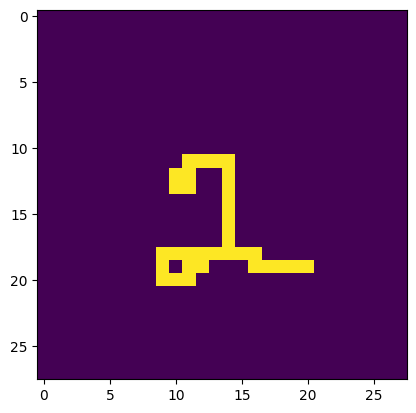

In [11]:
img = plt.imread('../Database/8.png')
plt.imshow(img)

res = model(np.array([img]))
print(np.argmax(res))
print(res)